# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  


c) ¿Hay algún atomizador mejor? Argumente su respuesta.



d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  


e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.







##A) Hipotesis


Con este estudio se busca demostrar  que las diferentes marcas de atomizadores no tienen el mismo nivel de efectividad para matar moscas.Por lo que se piensa que al aplicar los tres productos a grupos de moscas iguales, uno o más de ellos matarán a más moscas que los otros. También sabemos que las pruebas se hicieron en diferentes días, y por eso es posible que las condiciones del ambiente, como la temperatura o la humedad, hayan cambiado y eso puede afectar los resultados.

In [12]:
import pandas as pd
from io import StringIO

data = '''
marca,replica,valor
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69

'''

df = pd.read_csv(StringIO(data))
df
#XIMENA DAVALOS F.

,marca,replica,valor
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


In [13]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'marca'    # La variable que no me interesa comparar
interes = 'replica'      # La variable que me interesa comparar
respuesta = 'valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#XIMENA DAVALOS F.

Resultados del ANOVA:
                sum_sq    df         F    PR(>F)
C(replica)  281.333333   5.0  1.093973  0.420718
C(marca)    296.333333   2.0  2.880752  0.102804
Residual    514.333333  10.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


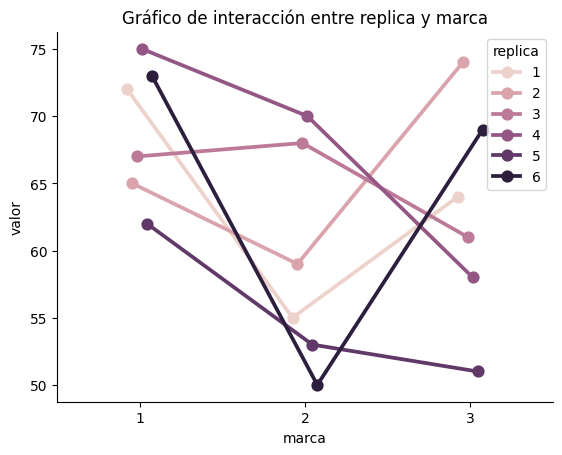

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()
#XIMENA DAVALOS F


##b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?

Como el valor p (0.1028.) es mayor a 0.05, no se rechaza la hipótesis nula,no hay diferencia significativa entre las marcas..

##c) ¿Hay algún atomizador mejor? Argumente su respuesta.

Sacando sus promedios, la marca 1 tiene el mejor promedio, pero la diferencia no es tan grande como para asegurar que es mejor.

Marca 1: (72 + 65 + 67 + 75 + 62 + 73) / 6 = 69.0

Marca 2: (55 + 59 + 68 + 70 + 53 + 50) / 6 = 59.2

Marca 3: (64 + 74 + 61 + 58 + 51 + 69) / 6 = 62.8

##d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.

Como p es mayor a 0.05, no se rechaza la hipótesis nula, por lo cual no hay evidencia de que los días afecten los resultados.



##E) Supuestos

In [15]:
from scipy.stats import shapiro
nivel_de_significancia = 0.05

def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['marca'] == 1]['valor'], "marca 1", nivel_de_significancia)
prueba_shapiro(df[df['marca'] == 2]['valor'], "marca 2", nivel_de_significancia)
prueba_shapiro(df[df['marca'] == 3]['valor'], "marca 3", nivel_de_significancia)

#XIMENA DAVALOS F.


Prueba de Shapiro-Wilk para marca 1:
Estadístico: 0.9385
Valor p: 0.6471
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para marca 2:
Estadístico: 0.9066
Valor p: 0.4145
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para marca 3:
Estadístico: 0.9947
Valor p: 0.9975
Interpretación: Los datos tienen una distribución normal.



Los residuoa siguen una distribucion normal porque P es mayor a 0.05

In [16]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['marca'] == 1]['valor'],
    df[df['marca'] == 2]['valor'],
    df[df['marca'] == 3]['valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
#XIMENA DAVALOS F.

Estadístico de Bartlett: 2.563987653883703
Valor p: 0.2774834944728171
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>

a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?



b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.

c) ¿Hay diferencia entre los silos?


d) ¿La temperatura de un día a otro es diferente?  



e) Revise residuos, ¿hay algún problema evidente?



##a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?

Factor de tratamiento: Silo

Factor de bloque: Dia

##B) Hipotesis

Se piensa que no todos los silos mantienen la leche a la misma temperatura, pero tambien es posible que uno o más silos tengan problemas y no estén enfriando bien, lo que puede ser malo para conservar la leche. Por eso se tomó la temperatura durante cinco días, siempre a la misma hora, para ver si hay diferencias entre ellos. También  el día en que se toma la temperatura puede influir, porque  un día puede hacer más calor o más frío.

H₀: La temperatura es igual todos los días

H₁: Algún día es diferente



In [9]:
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Lunes,4.0
A,Martes,4.0
A,Miércoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miércoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miércoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miércoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miércoles,3.5
E,Jueves,2.0
E,Viernes,4.0


'''

df = pd.read_csv(StringIO(data))
df

#XIMENA DAVALOS F.


,Silo,Dia,Valor
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miércoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miércoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


In [10]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#XIMENA DAVALOS F.

Resultados del ANOVA:
          sum_sq    df         F    PR(>F)
C(Silo)     4.46   4.0  0.690402  0.609212
C(Dia)      9.76   4.0  1.510836  0.246022
Residual   25.84  16.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


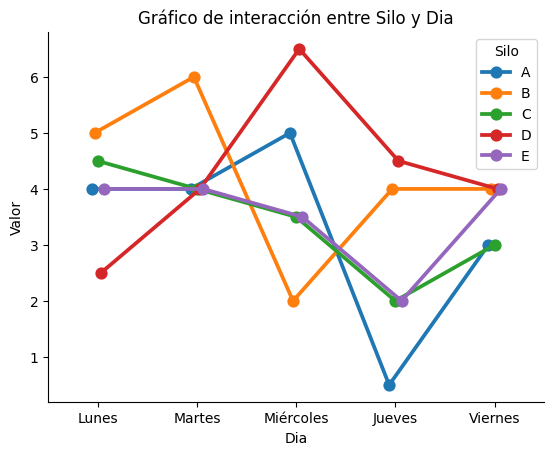

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()
#XIMENA DAVALOS F

##c) ¿Hay diferencia entre los silos?  
No, el valor p es 0.609, mayor que 0.05, por lo cual no hay diferencia significativa.

##d) ¿La temperatura de un día a otro es diferente?  

No, El valor-p es 0.246, también mayor que 0.05, por lo cual el clima o el día no afectan mucho.




##e) Revise residuos, ¿hay algún problema evidente?

 No hay problema evidente.
No hay temperaturas raras ni diferencias muy grandes.


In [12]:
from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Silo'] == "A"]['Valor'], "Silo A", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "B"]['Valor'], "Silo B", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "C"]['Valor'], "Silo C", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "D"]['Valor'], "Silo D", nivel_de_significancia)
prueba_shapiro(df[df['Silo'] == "E"]['Valor'], "Silo E", nivel_de_significancia)

#XIMENA DAVALOS F


Prueba de Shapiro-Wilk para Silo A:
Estadístico: 0.8854
Valor p: 0.3344
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo B:
Estadístico: 0.9556
Valor p: 0.7773
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo C:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo D:
Estadístico: 0.9306
Valor p: 0.6006
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Silo E:
Estadístico: 0.7008
Valor p: 0.0098
Interpretación: Los datos no tienen una distribución normal.


## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  


b) Formule la hipótesis que se quiere probar en este problema.



c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



##a) Señale el nombre del diseño experimental utilizado.  

Diseño de Bloques Completos Aleatorizados (DBCA)

##B) Hipotesis


Se concidera que no todos los detergentes limpian igual. Algunos podrían dejar la ropa más blanca que otros. Para comprobarlo, se usaron cuatro tipos de detergente en varias cargas de ropa, usando tres modelos diferentes de lavadoras. También es posible que el tipo de lavadora tenga un efecto en el resultado, ya que algunas pueden lavar mejor que otras. Por eso, se quiere saber si el detergente realmente influye en la blancura de la ropa, o si también la lavadora tiene un papel importante. La idea es ver si hay diferencias en los resultados según el detergente y el tipo de lavadora.




In [13]:
import pandas as pd
from io import StringIO

data = '''
Detergente,Lavadora,Valor
A,Lavadora1,45
A,Lavadora2,43
A,Lavadora3,51
B,Lavadora1,47
B,Lavadora2,44
B,Lavadora3,52
C,Lavadora1,50
C,Lavadora2,49
C,Lavadora3,57
D,Lavadora1,42
D,Lavadora2,37
D,Lavadora3,49
'''

df = pd.read_csv(StringIO(data))
df

#XIMENA DAVALOS F.

,Detergente,Lavadora,Valor
0,A,Lavadora1,45
1,A,Lavadora2,43
2,A,Lavadora3,51
3,B,Lavadora1,47
4,B,Lavadora2,44
5,B,Lavadora3,52
6,C,Lavadora1,50
7,C,Lavadora2,49
8,C,Lavadora3,57
9,D,Lavadora1,42


In [14]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lavadora'    # La variable que no me interesa comparar
interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#XIMENA DAVALOS F.

Resultados del ANOVA:
                   sum_sq   df          F    PR(>F)
C(Detergente)  133.666667  3.0  34.127660  0.000363
C(Lavadora)    170.166667  2.0  65.170213  0.000085
Residual         7.833333  6.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


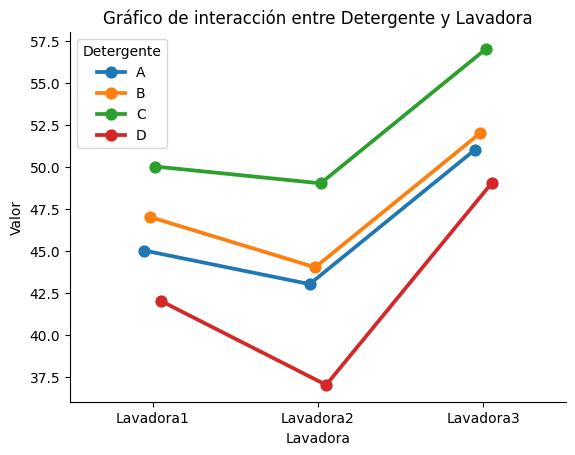

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()
#XIMENA DAVALOS F


En la gráfica se ve cómo funciona cada detergente en las tres lavadoras.
El detergente C da los mejores resultados en todas, y el D los peores, sobre todo en la Lavadora 2.
Aunque los valores cambian un poco de una lavadora a otra, la diferencia entre los detergentes se mantiene parecida.
Esto quiere decir que el tipo de detergente influye más que la lavadora, y no hay una combinación que cambie totalmente los resultados.
En conclusión, el detergente C es el más efectivo y el D el menos, sin importar la lavadora que se use

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  

Conclusión con ANOVA sin lavadoras:

**Sí hay diferencias significativas entre los detergentes, ya que el valorp = 0.000363, que es  menor a 0.05.**

b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  

**Si, si hay diferencias porque en el analisis sin la lavadora el valor de f (34.13) es mas grande que con la lavadora**


c) ¿Con cuáles conclusiones se queda? Explique su respuesta.




**Con el de las lavadoras, porque al incluir las lavadoras   en el análisis nos  ayuda a separar su efecto del efecto de los detergentes. Y asi se puede comparar los detergentes de una  manera mas justa,ya que si no incluimos las lavadoras,se puede interpretar como si los detergentes son diferentes cuando en realidad las diferencias se deben a las lavadoras.**




## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


##a) Plantee el modelo y las hipótesis más adecuadas al problema.

Como lo que se quiere es comparar dos equipos distintos (ese es el factor principal del estudio), y además se sabe que los operadores pueden influir en las mediciones, se usará el modelo BDCA.

 #### Hipotesis:

 Se quiere saber si los dos equipos que miden el ángulo del brazo lector del disco duro dan resultados diferentes. Es decir,  que uno de los equipos podría estar midiendo más alto o más bajo que el otro, aunque ambos están diseñados para medir lo mismo. Para hacer la prueba de forma justa, se pidió a tres operadores distintos que usaran ambos equipos, ya que cada operador podría manejar el equipo de forma un poco diferente, y eso también puede afectar los resultados, y por eso se toma en cuenta tanto el equipo como el operador.

In [16]:
import pandas as pd
from io import StringIO

data = '''
Operador,Equipo,Valor
1,Equipo1,1.328
1,Equipo1,0.985
1,Equipo1,1.316
1,Equipo1,1.553
1,Equipo1,1.310
1,Equipo1,1.113
1,Equipo1,1.057
1,Equipo1,1.144
1,Equipo1,1.485
1,Equipo1,1.386
1,Equipo2,1.273
1,Equipo2,0.985
1,Equipo2,1.134
1,Equipo2,1.412
1,Equipo2,0.917
1,Equipo2,0.789
1,Equipo2,0.671
1,Equipo2,0.554
1,Equipo2,1.386
1,Equipo2,1.289
2,Equipo1,1.269
2,Equipo1,1.268
2,Equipo1,1.091
2,Equipo1,1.195
2,Equipo1,1.380
2,Equipo1,1.093
2,Equipo1,0.984
2,Equipo1,1.087
2,Equipo1,1.482
2,Equipo1,1.442
2,Equipo2,1.036
2,Equipo2,0.783
2,Equipo2,1.108
2,Equipo2,1.129
2,Equipo2,1.132
2,Equipo2,0.201
2,Equipo2,0.900
2,Equipo2,0.916
2,Equipo2,1.434
2,Equipo2,1.223
3,Equipo1,1.440
3,Equipo1,1.079
3,Equipo1,1.389
3,Equipo1,1.611
3,Equipo1,1.445
3,Equipo1,1.150
3,Equipo1,1.190
3,Equipo1,1.247
3,Equipo1,1.617
3,Equipo1,1.574
3,Equipo2,1.454
3,Equipo2,1.063
3,Equipo2,1.219
3,Equipo2,1.602
3,Equipo2,1.583
3,Equipo2,1.018
3,Equipo2,1.050
3,Equipo2,0.997
3,Equipo2,1.538
3,Equipo2,1.478

'''

df = pd.read_csv(StringIO(data))
df

#XIMENA DAVALOS F.

,Operador,Equipo,Valor
0,1,Equipo1,1.328
1,1,Equipo1,0.985
2,1,Equipo1,1.316
3,1,Equipo1,1.553
4,1,Equipo1,1.310
5,1,Equipo1,1.113
6,1,Equipo1,1.057
7,1,Equipo1,1.144
8,1,Equipo1,1.485
9,1,Equipo1,1.386


In [17]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Operador'    # La variable que no me interesa comparar
interes = 'Equipo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#XIMENA DAVALOS F.

Resultados del ANOVA:
               sum_sq    df         F    PR(>F)
C(Equipo)    0.492502   1.0  8.089543  0.006205
C(Operador)  0.588721   2.0  4.834997  0.011561
Residual     3.409351  56.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


**Conclusión**

El experimento mostró que sí hay diferencias importantes entre los dos equipos que miden el ángulo del brazo lector. Lo que quiere decir que no miden exactamente igual, y uno podría ser más preciso.

También se encontró que los operadores si influyen en las mediciones, en resumen, los dos equipos no son iguales, y las personas que operan el equipo también pueden afectar los resultados.

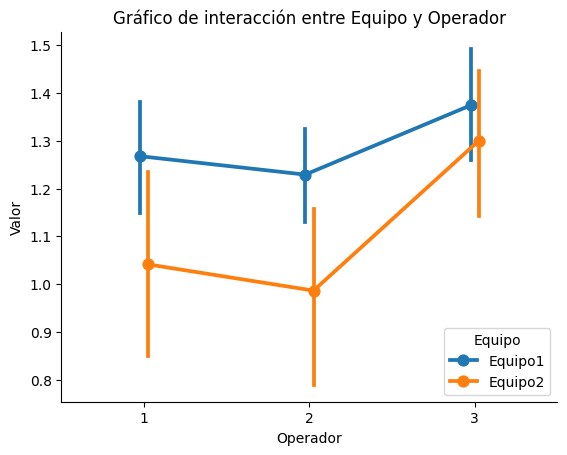

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

#XIMENA DAVALOS F

##d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores

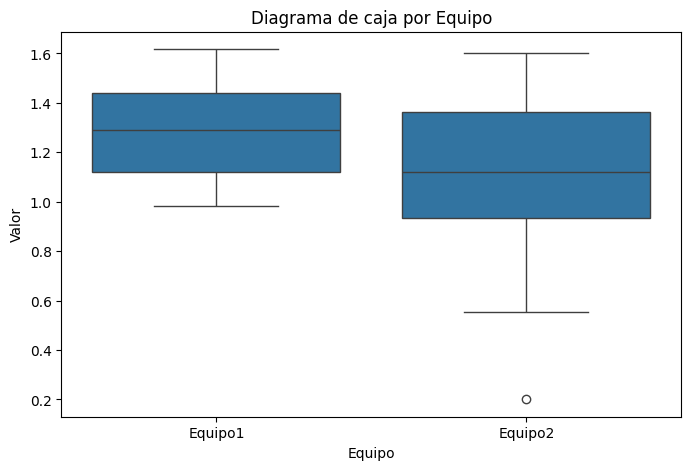

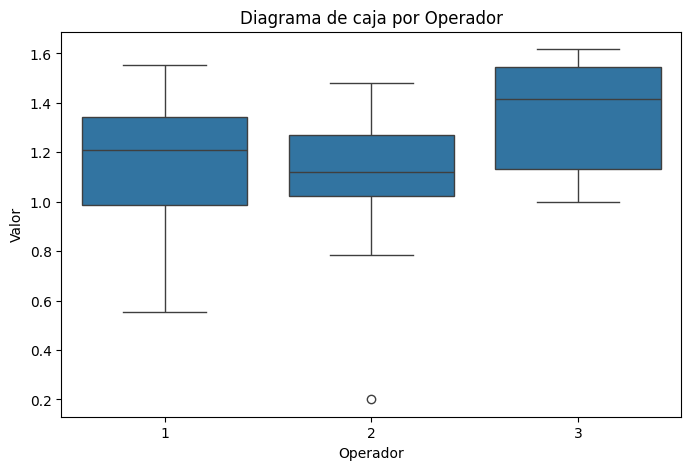

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de caja por equipo
plt.figure(figsize=(8,5))
sns.boxplot(x='Equipo', y='Valor', data=df)
plt.title('Diagrama de caja por Equipo')
plt.show()

# Diagrama de caja por operador
plt.figure(figsize=(8,5))
sns.boxplot(x='Operador', y='Valor', data=df)
plt.title('Diagrama de caja por Operador')
plt.show()

#XIMENA DAVALOS F

<ipython-input-20-1bffedfa3a3c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Equipo', y='Valor', data=df, capsize=0.1, ci='sd', join=False)
<ipython-input-20-1bffedfa3a3c>:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Equipo', y='Valor', data=df, capsize=0.1, ci='sd', join=False)


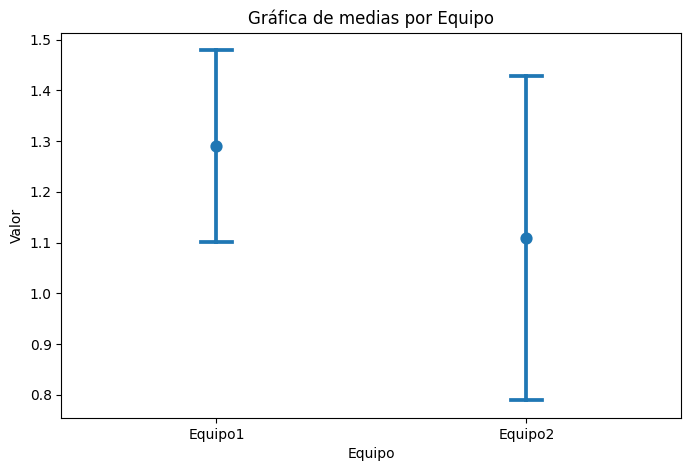

<ipython-input-20-1bffedfa3a3c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Operador', y='Valor', data=df, capsize=0.1, ci="sd", join=False)
<ipython-input-20-1bffedfa3a3c>:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Operador', y='Valor', data=df, capsize=0.1, ci="sd", join=False)


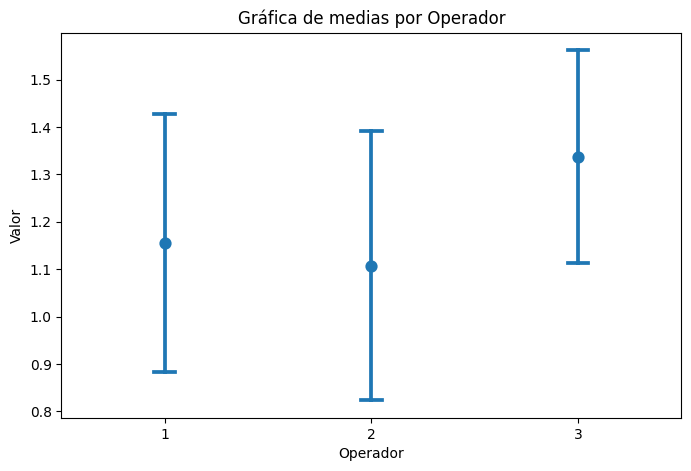

In [20]:
# Gráfica de medias por equipo
plt.figure(figsize=(8,5))
sns.pointplot(x='Equipo', y='Valor', data=df, capsize=0.1, ci='sd', join=False)
plt.title('Gráfica de medias por Equipo')
plt.show()

# Gráfica de medias por operador
plt.figure(figsize=(8,5))
sns.pointplot(x='Operador', y='Valor', data=df, capsize=0.1, ci="sd", join=False)
plt.title('Gráfica de medias por Operador')
plt.show()

#XIMENA DAVALOS F.


**Interpretación**

Los gráficos confirman lo que mostró el análisis estadístico, que sí hay diferencias importantes entre los equipos, y que sí influye quién opera el equipo.No todos los equipos ni todos los operadores producen los mismos resultados, por lo que ambos factores deben tomarse en cuenta para asegurar mediciones confiables.

**e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.**

In [21]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Equipo'] == 1]['Valor'], "Equipo 1", nivel_de_significancia)
prueba_shapiro(df[df['Equipo'] == 2]['Valor'], "Equipo 2", nivel_de_significancia)

#XIMENA DAVALOS F


Prueba de Shapiro-Wilk para Equipo 1:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Equipo 2:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.


<ipython-input-21-f1e6db895751>:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(datos)


In [22]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Equipo'] == 1]['Valor'],
    df[df['Equipo'] == 2]['Valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#XIMENA DAVALOS F

Estadístico de Bartlett: nan
Valor p: nan
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


<ipython-input-22-67481897284e>:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = bartlett(


## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


##a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).

Al observar los datos, parece que las mediciones hechas con los termómetros electrónicos (Rtd) no siempre coinciden con las del termómetro de mercurio (Mer), que es el método  tradicional. En algunos casos, las temperaturas medidas con el Rtd son muy diferentes, a veces mucho más bajas o más altas que las del mercurio, e incluso hay valores negativos donde no tendría sentido que la temperatura sea tan baja, lo que dice que los termómetros electrónicos no están midiendo con precisión.

In [23]:
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Día 1,2.6
A,Día 2,2.8
A,Día 3,5.0
A,Día 4,0.0
A,Día 5,2.4
B,Día 1,6.4
B,Día 2,6.4
B,Día 3,2.3
B,Día 4,4.2
B,Día 5,4.0
C,Día 1,3.3
C,Día 2,1.4
C,Día 3,1.8
C,Día 4,-1.9
C,Día 5,-7.6
D,Día 1,3.1
D,Día 2,5.0
D,Día 3,6.6
D,Día 4,2.7
D,Día 5,4.0
E,Día 1,0.0
E,Día 2,3.5
E,Día 3,2.0
E,Día 4,-4.0
E,Día 5,-6.3

'''

df = pd.read_csv(StringIO(data))
df


#XIMENA DAVALOS F.

,Silo,Dia,Valor
0,A,Día 1,2.6
1,A,Día 2,2.8
2,A,Día 3,5.0
3,A,Día 4,0.0
4,A,Día 5,2.4
5,B,Día 1,6.4
6,B,Día 2,6.4
7,B,Día 3,2.3
8,B,Día 4,4.2
9,B,Día 5,4.0


##Modelo estadistico

In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#XIMENA DAVALOS F

Resultados del ANOVA:
            sum_sq    df         F    PR(>F)
C(Silo)   140.5424   4.0  6.189550  0.003304
C(Dia)     86.8984   4.0  3.827044  0.022852
Residual   90.8256  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


**Conclusión**

En el annova nos dice que no todos los silos están conservando la leche a la misma temperatura. Algunos tienen temperaturas más altas o más bajas, lo que puede afectar la calidad del producto si no se controla bien o caducarse, asi mismo la temperatura varía de un día a otro.

Por lo tanto, si se quiere asegurar que toda la leche se conserve correctamente, es importante revisar cada silo de forma individual y monitorear las temperaturas.

##C) MEDICIONES MER

In [25]:
import pandas as pd
from io import StringIO

data = '''
Silo,Dia,Valor
A,Día 1,4.0
A,Día 2,4.0
A,Día 3,5.0
A,Día 4,0.5
A,Día 5,3.0
B,Día 1,5.0
B,Día 2,6.0
B,Día 3,2.0
B,Día 4,4.0
B,Día 5,4.0
C,Día 1,4.5
C,Día 2,4.0
C,Día 3,3.5
C,Día 4,2.0
C,Día 5,3.0
D,Día 1,2.5
D,Día 2,4.0
D,Día 3,6.5
D,Día 4,4.5
D,Día 5,4.0
E,Día 1,4.0
E,Día 2,4.0
E,Día 3,0.6
E,Día 4,-4.0
E,Día 5,-4.0

'''

df = pd.read_csv(StringIO(data))
df

#XIMENA DAVALOS F

,Silo,Dia,Valor
0,A,Día 1,4.0
1,A,Día 2,4.0
2,A,Día 3,5.0
3,A,Día 4,0.5
4,A,Día 5,3.0
5,B,Día 1,5.0
6,B,Día 2,6.0
7,B,Día 3,2.0
8,B,Día 4,4.0
9,B,Día 5,4.0


In [26]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Dia'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#XIMENA DAVALOS F

Resultados del ANOVA:
           sum_sq    df         F    PR(>F)
C(Silo)   58.2696   4.0  3.697403  0.025752
C(Dia)    33.8496   4.0  2.147872  0.121867
Residual  63.0384  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


**CONCLUSIÓN  PARA  MER**

El análisis muestra que sí hay diferencias de temperatura entre los silos cuando se mide con el termómetro de mercurio. Esto quiere decir que algunos silos están más fríos o más calientes que otros, y esa diferencia es real, no es por una casualidad.

Y por otro lado, no se encontraron diferencias importantes entre los días de medición. Esto quiere decir que según este termómetro, la temperatura no cambia tanto de un día a otro desde el punto de vista estadístico.

##d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.

Sí, hay cambios en las temperaturas entre los silos. Tanto el termómetro electrónico como el de mercurio y se mostro que no todos los silos mantienen la misma temperatura, lo cual es importante porque puede afectar la conservación de la leche, pero las mediciones no coinciden del todo respecto a los días, ya que con el termómetro electrónico, sí se encontraron cambios de temperatura entre los días y con el termómetro de mercurio, no se encontraron cambios importantes entre los días.



 ## E)DATOS PAREADOS

Factor de interés (tratamiento): el tipo de termómetro

Dos bloques: el Silo y el Día

Respuesta: la temperatura medida


In [27]:
import pandas as pd
from io import StringIO
data = '''
Silo,Día,Categoría,Valor
A,Día 1,Mer,4.0
A,Día 1,Rtd,2.6
A,Día 2,Mer,4.0
A,Día 2,Rtd,2.8
A,Día 3,Mer,5.0
A,Día 3,Rtd,5.0
A,Día 4,Mer,0.5
A,Día 4,Rtd,0.0
A,Día 5,Mer,3.0
A,Día 5,Rtd,2.4
B,Día 1,Mer,5.0
B,Día 1,Rtd,6.4
B,Día 2,Mer,6.0
B,Día 2,Rtd,6.4
B,Día 3,Mer,2.0
B,Día 3,Rtd,2.3
B,Día 4,Mer,4.0
B,Día 4,Rtd,4.2
B,Día 5,Mer,4.0
B,Día 5,Rtd,4.0
C,Día 1,Mer,4.5
C,Día 1,Rtd,3.3
C,Día 2,Mer,4.0
C,Día 2,Rtd,1.4
C,Día 3,Mer,3.5
C,Día 3,Rtd,1.8
C,Día 4,Mer,2.0
C,Día 4,Rtd,-1.9
C,Día 5,Mer,3.0
C,Día 5,Rtd,-7.6
D,Día 1,Mer,2.5
D,Día 1,Rtd,3.1
D,Día 2,Mer,4.0
D,Día 2,Rtd,5.0
D,Día 3,Mer,6.5
D,Día 3,Rtd,6.6
D,Día 4,Mer,4.5
D,Día 4,Rtd,2.7
D,Día 5,Mer,4.0
D,Día 5,Rtd,4.0
E,Día 1,Mer,4.0
E,Día 1,Rtd,0.0
E,Día 2,Mer,4.0
E,Día 2,Rtd,3.5
E,Día 3,Mer,0.6
E,Día 3,Rtd,2.0
E,Día 4,Mer,-4.0
E,Día 4,Rtd,-4.0
E,Día 5,Mer,-4.0
E,Día 5,Rtd,-6.3
'''
df = pd.read_csv(StringIO(data))
df

#XIMENA DAVALOS

,Silo,Día,Categoría,Valor
0,A,Día 1,Mer,4.0
1,A,Día 1,Rtd,2.6
2,A,Día 2,Mer,4.0
3,A,Día 2,Rtd,2.8
4,A,Día 3,Mer,5.0
5,A,Día 3,Rtd,5.0
6,A,Día 4,Mer,0.5
7,A,Día 4,Rtd,0.0
8,A,Día 5,Mer,3.0
9,A,Día 5,Rtd,2.4


In [28]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Silo'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

#XIMENA DAVALOS F

Resultados del ANOVA para el Cuadro Latino:
                sum_sq    df         F    PR(>F)
C(Categoría)   14.4722   1.0  2.976019  0.092227
C(Silo)       168.4692   4.0  8.660872  0.000039
C(Día)        110.4372   4.0  5.677491  0.001025
Residual      194.5176  40.0       NaN       NaN

Conclusión: No hay diferencias significativas: Categoría.
Conclusión: Hay diferencias significativas: Silo.
Conclusión: Hay diferencias significativas: Día.


**CONCLUSIÓN**

Mer y Rtd

El p-valor es mayor que 0.05, por lo cual no hay evidencia suficiente para afirmar que los dos termómetros dan resultados significativamente diferentes.


Sí hay diferencias significativas entre silos y días, lo que indica que la temperatura varía dependiendo del silo y del día.

En conclusión, los nuevos termómetros electrónicos parecen funcionar bien, pero la temperatura sí cambia según el silo y el día, así que hay que seguir revisando todo el sistema para asegurarse de mantener bien conservada la leche.


## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


## a) ¿Cómo se aleatorizó el experimento?

El experimento se hizo usando un diseño en cuadro latino, porque  los cinco catalizadores (A, B, C, D y E) se asignaron de forma que solo aparecen una vez en cada lote y en cada día, para comparar bien los catalizadores, sin que los resultados se mezclen con diferencias entre lotes o días.

In [13]:
import pandas as pd
from io import StringIO

data = '''
Lote,Dia,Categorias,Valor
1,Dia1,A,8
1,Dia2,B,7
1,Dia3,D,1
1,Dia4,C,7
1,Dia5,E,3
2,Dia1,C,11
2,Dia2,E,2
2,Dia3,A,7
2,Dia4,D,3
2,Dia5,B,8
3,Dia1,B,4
3,Dia2,A,9
3,Dia3,C,10
3,Dia4,E,1
3,Dia5,D,5
4,Dia1,D,6
4,Dia2,C,8
4,Dia3,E,6
4,Dia4,B,6
4,Dia5,A,10
5,Dia1,E,4
5,Dia2,D,2
5,Dia3,B,3
5,Dia4,A,8
5,Dia5,C,8
'''

df = pd.read_csv(StringIO(data))
df

#XIMENA DAVALOS F.

,Lote,Dia,Categorias,Valor
0,1,Dia1,A,8
1,1,Dia2,B,7
2,1,Dia3,D,1
3,1,Dia4,C,7
4,1,Dia5,E,3
5,2,Dia1,C,11
6,2,Dia2,E,2
7,2,Dia3,A,7
8,2,Dia4,D,3
9,2,Dia5,B,8


## B) MODELO

In [14]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Lote'   # Primer bloque (factor no principal)
bloque_2 = 'Dia'      # Segundo bloque (factor no principal)
interes = 'Categorias'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

#XIMENA DAVALOS F

Resultados del ANOVA para el Cuadro Latino:
               sum_sq    df          F    PR(>F)
C(Categorias)  141.44   4.0  11.309168  0.000488
C(Lote)         15.44   4.0   1.234542  0.347618
C(Dia)          12.24   4.0   0.978678  0.455014
Residual        37.52  12.0        NaN       NaN

Conclusión: Hay diferencias significativas: Categorias.
Conclusión: No hay diferencias significativas: Lote.
Conclusión: No hay diferencias significativas: Dia.


##c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

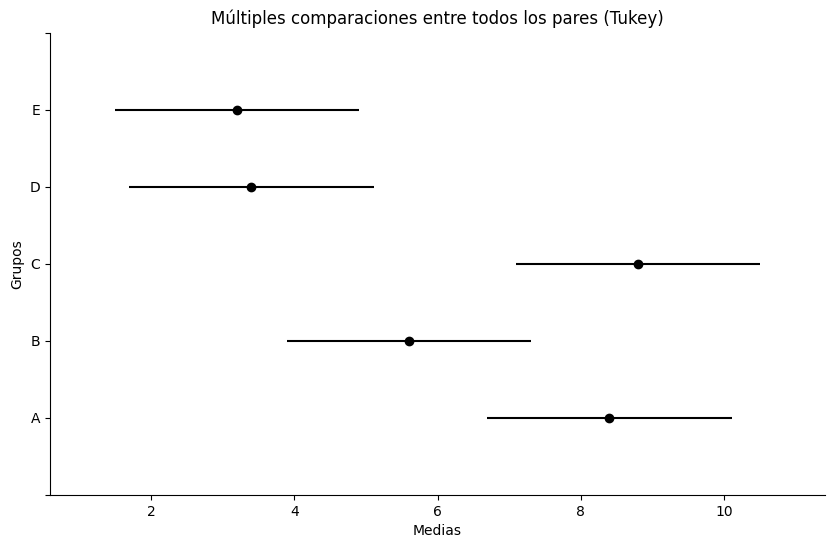

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Categorias'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#XIMENA DAVALOS F

##d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?

En el ANOVA, se ve que los factores de bloqueo, que en este caso son los lotes de material y los días de prueba, no tienen un efecto importante en el tiempo de reacción, lo que quiere decir que  aunque se usaron materiales de distintos lotes y se midieron los tiempos en diferentes días, esto no afectó de manera significativa el tiempo que tardó en reaccionar.

##e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días.


<ipython-input-17-2dda728fb623>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Categorias", y="Valor", estimator=np.mean, ci=None)
<ipython-input-17-2dda728fb623>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Lote", y="Valor", estimator=np.mean, ci=None)
<ipython-input-17-2dda728fb623>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x="Dia", y="Valor", estimator=np.mean, ci=None)


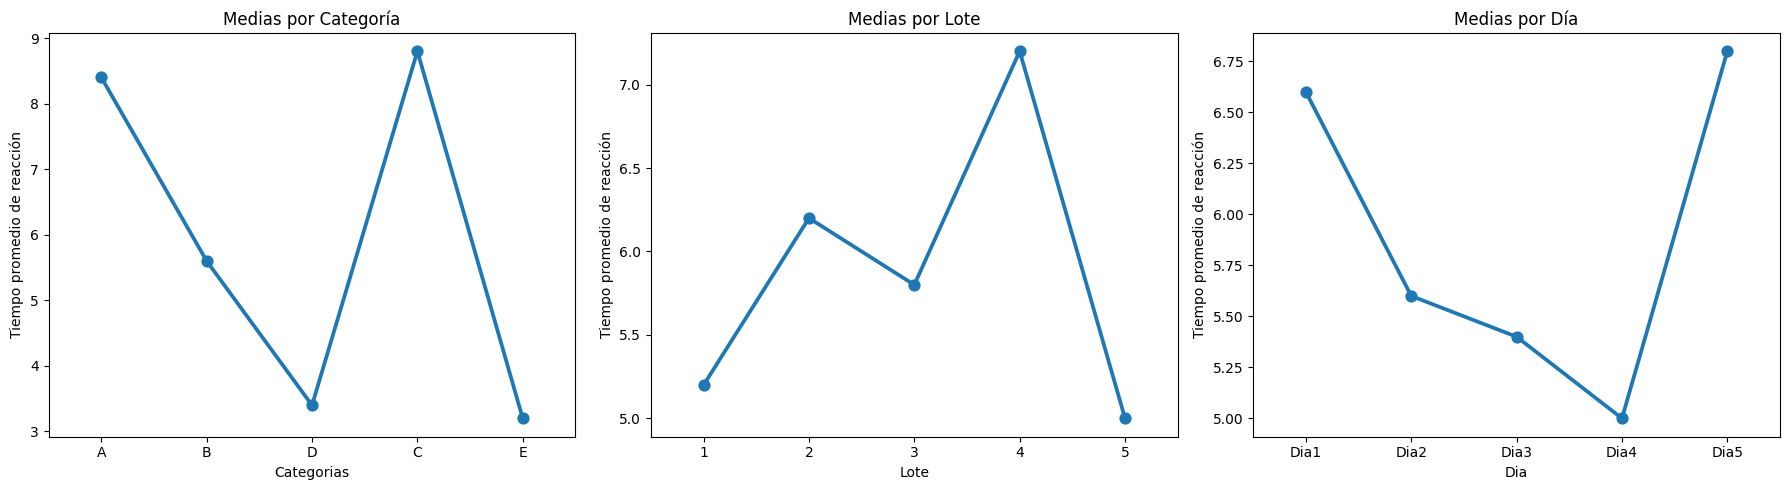

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gráfico de medias por tratamiento (Catalizador)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.pointplot(data=df, x="Categorias", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Categoría")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Lote
plt.subplot(1, 3, 2)
sns.pointplot(data=df, x="Lote", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Lote")
plt.ylabel("Tiempo promedio de reacción")

# Gráfico de medias por Día
plt.subplot(1, 3, 3)
sns.pointplot(data=df, x="Dia", y="Valor", estimator=np.mean, ci=None)
plt.title("Medias por Día")
plt.ylabel("Tiempo promedio de reacción")

plt.tight_layout()
plt.show()

#XIMENA DAVALOS F

##f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.

In [33]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Categorias'] == 'A']['Valor'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Categorias'] == 'B']['Valor'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Categorias'] == 'C']['Valor'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Categorias'] == 'D']['Valor'], "Grupo D", nivel_de_significancia)
prueba_shapiro(df[df['Categorias'] == 'E']['Valor'], "Grupo E", nivel_de_significancia)

#XIMENA DAVALOS F



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9609
Valor p: 0.8140
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9137
Valor p: 0.4899
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9524
Valor p: 0.7540
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo E:
Estadístico: 0.9787
Valor p: 0.9276
Interpretación: Los datos tienen una distribución normal.


In [34]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Categorias'] == 'A']['Valor'],
    df[df['Categorias'] == 'B']['Valor'],
    df[df['Categorias'] == 'C']['Valor'],
    df[df['Categorias'] == 'D']['Valor'],
    df[df['Categorias'] == 'E']['Valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#XIMENA DAVALOS F


Estadístico de Bartlett: 3.964568090461087
Valor p: 0.4108222744947537
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


En el problema anterior elimine el factor de bloque días, y conteste:

##a) ¿Se justifica la eliminación?

Se puede decir que si porque en el anova el resultado de p no es significativo.
##b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.
BDCA

HIPOTESIS

En este experimento se quiere evaluar si el tipo de categorias influye en el tiempo de reacción.
Se tienen cinco categorias distintos: A, B, C, D y E.
La hipótesis nula (H₀) plantea que todos los catalizadores producen el mismo tiempo, sin diferencias entre ellos.

La hipótesis alternativa (H₁) indica que al menos uno de los catalizadores produce un tiempo de reacción distinto.
El objetivo es determinar si el catalizador tiene un efecto significativo en el proceso químico.

##c) Pruebe las hipótesis y obtenga conclusiones.



In [2]:

import pandas as pd
from io import StringIO

data = '''
Lote,Categorias,Valor
1,A,8
1,B,7
1,D,1
1,C,7
1,E,3
2,C,11
2,E,2
2,A,7
2,D,3
2,B,8
3,B,4
3,A,9
3,C,10
3,E,1
3,D,5
4,D,6
4,C,8
4,E,6
4,B,6
4,A,10
5,E,4
5,D,2
5,B,3
5,A,8
5,C,8

'''

df = pd.read_csv(StringIO(data))
df
#XIMENA DAVALOS F

,Lote,Categorias,Valor
0,1,A,8
1,1,B,7
2,1,D,1
3,1,C,7
4,1,E,3
5,2,C,11
6,2,E,2
7,2,A,7
8,2,D,3
9,2,B,8


In [3]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Categorias'    # La variable que no me interesa comparar
interes = 'Lote'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#XIMENA DAVALOS F

Resultados del ANOVA:
               sum_sq    df          F    PR(>F)
C(Lote)         15.44   4.0   1.241158  0.333144
C(Categorias)  141.44   4.0  11.369775  0.000146
Residual        49.76  16.0        NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


En el (ANOVA), se encontró que el tipo de categorias sí tiene un efecto significativo sobre el tiempo de reacción, ya que el valor de p = 0.000146 es mucho menor que 0.05, y no se encontraron diferencias significativas entre los lotes, ya que el valor de p = 0.3331 es mayor que 0.05, lo que quiere decir que la variabilidad entre lotes no afecta de forma importante al tiempo de reacción.

En conclusión, las categorias influyen en el resultado, mientras que el lote no tiene un efecto importante en el experimento.



##d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?

El error fue más pequeño en este experimento porque se usaron los lotes como bloques. Esto ayudó a quitar parte de la variación que no tiene que ver con los catalizadore, por eso el experimento fue más preciso y es más confiable.
##e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?

Porque los datos de los catalizadores no cambiaron.
Aunque en un experimento se usaron los lotes como bloques y en el otro no, los resultados de los catalizadores son los mismos.
Las diferencias entre los catalizadores son muy claras que se pueden ver en lo dos analisis.
Por eso, aunque el diseño del experimento fue un poco diferente, la conclusión sigue siendo igual: sí hay diferencias entre los catalizadores.

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


##a) ¿Se justifica esta segunda eliminación en ambos problemas?
Sí,porque estos factores no aportan información relevante ni explican variación importante en los resultados, tiene su valor p muy alto
##b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.
BDCA

HIPOTESIS:

Hipótesis para bloques (lotes):
Hipótesis nula (H₀): Los diferentes lotes no tienen efecto sobre el tiempo de reacción; no hay diferencias entre bloques.

Hipótesis alternativa (H₁): Al menos un lote tiene un efecto distinto en el tiempo de reacción, mostrando diferencias entre los bloques.

Hipótesis para las categorias:
Hipótesis nula (H₀): Todos las categorias tienen el mismo efecto sobre el tiempo de reacción; es decir, no hay diferencias entre ellos.

Hipótesis alternativa (H₁): Al menos una categoria produce un tiempo de reacción diferente, indicando que existen diferencias entre los tratamientos.



##c) Pruebe las hipótesis y obtenga conclusiones.

In [37]:
import pandas as pd
from io import StringIO

data = '''
Categorias,Valor
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,6
B,6
A,10
E,4
D,2
B,3
A,8
C,8
'''

df = pd.read_csv(StringIO(data))
df
#XIMENA DAVALOS F

,Categorias,Valor
0,A,8
1,B,7
2,D,1
3,C,7
4,E,3
5,C,11
6,E,2
7,A,7
8,D,3
9,B,8


In [39]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

interes = 'Categorias'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")
#XIMENA DAVALOS F

Resultados del ANOVA:
               sum_sq    df          F    PR(>F)
C(Categorias)  141.44   4.0  10.846626  0.000077
Residual        65.20  20.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.


Con base en los resultados del  (ANOVA), se observa que el valor de p = 0.000077 es mucho menor que 0.05, lo que indica que existen diferencias  significativas entre los tratamientos (categorías).
Esto significa que al menos una de las categorias produce un tiempo de reacción diferente comparado con los demás.
Por eso se rechaza la hipótesis nula que plantea que todos los tratamientos tienen el mismo efecto, y se puede decir que el tipo de catalizador influye de forma importante en el resultado del proceso.

##d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?

Observe que al quitar los dos factores de bloqueo, el error del análisis aumentó en comparación con cuando sí se usaban.
Esto tiene sentido, porque al no tomar en cuenta las diferencias entre los días y los lotes, esa variación se suma al error.
Como resultado, el modelo se vuelve menos exacto.
Esto demuestra que los bloques (día y lote) ayudaban a controlar parte de la variación y hacían el análisis más preciso y confiable.



##e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?

Porque en los  problemas se usaron los mismos datos para los tratamientos (las mismas categorias y tiempos de reacción).
Aunque cambió el diseño del experimento o se eliminaron algunos factores, los resultados de los tratamientos no cambiaron.
Las diferencias entre los catalizadores eran claras y grandes, por eso se detectaron en todos los casos, y eliminar factores que no son importantes no afecta las conclusiones sobre los tratamientos.
Por eso, la conclusión sigue siendo la misma, hay diferencias significativas entre los catalizadores.

##f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?
Sí,porque si los factores de bloque como el día o el lote hubieran sido significativos, eliminarlos habría afectado los resultados.
Podría pasar que, si quitamos un bloque que sí influye, estamos dejando fuera una parte importante del experimento y esa variación que antes se controlaba ahora se va al error, y eso hace que el análisis sea menos preciso.
Al no controlar esa variación, podríamos no notar diferencias reales entre tratamientos o ver diferencias que en realidad no existen.


## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [41]:
import pandas as pd
from io import StringIO

data = '''
Inspector,Escala,Proveedor,Peso
I,1,A,16
I,2,B,10
I,3,C,11
II,1,B,15
II,2,C,9
II,3,A,14
III,1,C,13
III,2,A,11
III,3,B,13

'''

df = pd.read_csv(StringIO(data))
df

#XIMENA DAVALOS F.

,Inspector,Escala,Proveedor,Peso
0,I,1,A,16
1,I,2,B,10
2,I,3,C,11
3,II,1,B,15
4,II,2,C,9
5,II,3,A,14
6,III,1,C,13
7,III,2,A,11
8,III,3,B,13


In [42]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Inspector'   # Primer bloque (factor no principal)
bloque_2 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Proveedor'       # Variable de interés (tratamiento)
respuesta = 'Peso'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
#XIMENA DAVALOS F

Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Proveedor)  10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: Proveedor.
Conclusión: No hay diferencias significativas: Inspector.
Conclusión: Hay diferencias significativas: Escala.


#Preguntas:

##a) ¿Hay diferencias entre los proveedores?

Sí, hay diferencias importantes entre los proveedores. El valor de p fue 0.020, lo cual indica que al menos uno de los proveedores entrega un peso distinto a los demás. Lo que quiere decir que el proveedor influye directamente en la calidad del producto por su peso.

##b) ¿Hay diferencias entre los inspectores y entre las escalas?

* No hay diferencias entre los inspectores (p = 0.500), por lo que quien mida el producto no cambia significativamente los resultados.

* Sí hay diferencias entre las escalas (p = 0.0067), lo que indica que las balanzas utilizadas sí afectan el peso registrado. Es importante revisar o calibrar las escalas para asegurar precisión.


##c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?

El Proveedor A es el mejor, ya que su peso promedio (13.67 g) es el más cercano al objetivo de 15 gramos. Aunque no llega al peso ideal, es el proveedor que más se aproxima, por lo que sería el más adecuado si se busca cumplir esa meta.

PROMEDIOS:

* Proveedor A: (16 + 14 + 11) / 3 = 13.67 g

* Proveedor B: (10 + 15 + 13) / 3 = 12.67 g

* Proveedor C: (11 + 9 + 13) / 3 = 11.00 g




##d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.

El factor "Inspector" no es significativo porque su valor es mas alto que 0.05 (p = 0.500), así que se puede eliminar.

In [36]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Escala'    # La variable que no me interesa comparar
interes = 'Proveedor'      # La variable que me interesa comparar
respuesta = 'Peso' # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

#XIMENA DAVALOS F

Resultados del ANOVA:
                 sum_sq   df      F    PR(>F)
C(Proveedor)  10.888889  2.0   49.0  0.001538
C(Escala)     32.888889  2.0  148.0  0.000178
Residual       0.444444  4.0    NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


**CONCLUSIÓN**

El análisis ANOVA muestra que sí hay diferencias importantes entre los proveedores (p = 0.0015), lo que indica que no todos entregan materiales con el mismo peso, asi mismo las escalas utilizadas afectan los resultados (p = 0.0002), por lo que el equipo de medición influye en el peso. Ambos factores, proveedor y escala, son estadísticamente significativos, ya que sus valores de p son menores a 0.05. En conclusión, sí importa de qué proveedor viene el material y qué escala se usa para medirlo.

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [44]:
import pandas as pd
from io import StringIO

data = '''
Renglon,Columna,Variedad,Valores
1,1,B,1.640
1,2,D,1.210
1,3,C,1.425
1,4,A,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660

'''

df = pd.read_csv(StringIO(data))
df

#XIMENA DAVALOS F.

,Renglon,Columna,Variedad,Valores
0,1,1,B,1.640
1,1,2,D,1.210
2,1,3,C,1.425
3,1,4,A,1.345
4,2,1,C,1.475
5,2,2,A,1.185
6,2,3,D,1.400
7,2,4,B,1.290
8,3,1,A,1.670
9,3,2,C,0.710


In [45]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Columna'   # Primer bloque (factor no principal)
bloque_2 = 'Renglon'      # Segundo bloque (factor no principal)
interes = 'Variedad'       # Variable de interés (tratamiento)
respuesta = 'Valores'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

#XIMENA DAVALOS F.

Resultados del ANOVA para el Cuadro Latino:
               sum_sq   df          F    PR(>F)
C(Variedad)  0.426842  3.0   6.587865  0.025092
C(Columna)   0.827342  3.0  12.769166  0.005148
C(Renglon)   0.030155  3.0   0.465406  0.716972
Residual     0.129584  6.0        NaN       NaN

Conclusión: Hay diferencias significativas: Variedad.
Conclusión: Hay diferencias significativas: Columna.
Conclusión: No hay diferencias significativas: Renglon.


#Preguntas y ejercicios:


##a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?

Sí, hay diferencias significativas en el rendimiento entre las variedades, porque el p-valor para el factor Variedad es 0.0251, menor que 0.05.

##b) ¿Cuál de los factores de bloque tuvo efectos?

Solo el factor columna porque su valor de p es mucho menor qeu 0.05


##c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?

Probablemento no porque es un diseño  al azar, y los tratamientos se asignarian sin tener en cuenta las diferencias  que existen en el terreno y asi no se controlaria la diferencia que puede haber en diferentes partes del campo, como  la fertilidad del suelo.En el analisis se pudo ver que la fertilidad cambia según la columna del campo, y esto afectaria mucho el rendimiento del maíz.

##d) ¿Y con un diseño en bloques completos al azar?

Podria ser que sí, pero depende de commo los acomoden porque en un diseño en bloques completos al azar, se agrupan las zonas del campo que son parecidas para que los tratamientos se prueben en condiciones más iguales. Si en este experimento se hubieran hecho bloques usando las columnas del campo, que sí afectaron los resultados, se habría podido notar mejor si había diferencias entre las variedades de maíz.

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [1]:

import pandas as pd
from io import StringIO

data = '''
Apetito,Peso,Dieta,Valor
P1,A1,C,67
P1,A2,A,105
P1,A3,B,95
P1,A1,A,72
P1,A2,B,112
P1,A3,C,86
P2,A1,A,85
P2,A2,B,75
P2,A3,C,88
P2,A1,B,98
P2,A2,C,110
P3,A1,B,66
P3,A2,C,68
P3,A3,A,108
P3,A1,C,47
P3,A2,A,91
P3,A3,B,120
'''

df = pd.read_csv(StringIO(data))
df
#XIMENA DAVALOS F

,Apetito,Peso,Dieta,Valor
0,P1,A1,C,67
1,P1,A2,A,105
2,P1,A3,B,95
3,P1,A1,A,72
4,P1,A2,B,112
5,P1,A3,C,86
6,P2,A1,A,85
7,P2,A2,B,75
8,P2,A3,C,88
9,P2,A1,B,98


In [2]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Apetito'   # Primer bloque (factor no principal)
bloque_2 = 'Peso'      # Segundo bloque (factor no principal)
interes = 'Dieta'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

  #XIMENA DAVALOS F.


Resultados del ANOVA para el Cuadro Latino:
                 sum_sq    df         F    PR(>F)
C(Dieta)    1162.627040   2.0  2.192871  0.162308
C(Apetito)   365.203963   2.0  0.688824  0.524490
C(Peso)     2527.370629   2.0  4.766961  0.035160
Residual    2650.924242  10.0       NaN       NaN

Conclusión: No hay diferencias significativas: Dieta.
Conclusión: No hay diferencias significativas: Apetito.
Conclusión: Hay diferencias significativas: Peso.


#**Preguntas:**

##a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?

De acuerdo con el análisis de varianza (ANOVA), el único factor que presenta un efecto estadísticamente significativo sobre el aumento de peso es el peso inicial de las ratas (p = 0.035).

En el analisis, la dieta (p = 0.162) ni el apetito (p = 0.524) muestran efectos significativos desde el punto de vista estadístico, ya que según los datos obtenidos, no se evidencian diferencias reales en el aumento de peso  al tipo de dieta suministrada o al apetito inicial de los animales.

##b) ¿Cuál dieta es mejor?

El análisis no mostró diferencias claras entre las dietas, y no se puede decir con seguridad que una dieta sea mejor que otra, ya que las diferencias podrían deberse al azar y no a un efecto real. Además, el número de ratas y la variación entre ellas no son suficientes para sacar conclusiones firmes.

Por eso, este experimento no da pruebas suficientes para recomendar una dieta como la mejor en cuanto al peso ganado.


##c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.

El  apetito puede ser innecesario  porque no mostró influencia significativa sobre el peso ganado (p = 0.524) y por otro lado, el peso inicial es un factor que no debe ser ignorado. Tiene un efecto significativo (p = 0.035), lo que quiere decir que  la variabilidad causada por diferencias  en el peso de las ratas es importante para obtener resultados más precisos y confiables.

##d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.

Si  no tomamos en cuenta el apetito, el análisis se puede hacer más fácil usando solo la dieta y el peso con el que empezaron las ratas, pero es muy probable que el peso inicial siga siendo importante, y que la dieta no muestre  diferencias.
En este analisis, el peso con el que empezaron las ratas ayuda más a explicar cuánto subieron de peso que el tipo de comida que se les dio. Por eso, se puede decir que las dietas no hacen una diferencia clara en el peso ganado cuando se considera el peso inicial.


##e) Verifique los supuestos del modelo.

In [3]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Dieta'] == 'A']['Valor'], 'Dieta A', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'B']['Valor'], 'Dieta B', nivel_de_significancia)
prueba_shapiro(df[df['Dieta'] == 'C']['Valor'], 'Dieta C', nivel_de_significancia)

#XIMENA DAVALOS F



Prueba de Shapiro-Wilk para Dieta A:
Estadístico: 0.9451
Valor p: 0.7024
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta B:
Estadístico: 0.9525
Valor p: 0.7601
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Dieta C:
Estadístico: 0.9720
Valor p: 0.9059
Interpretación: Los datos tienen una distribución normal.


In [4]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Dieta'] == 'A']['Valor'],
    df[df['Dieta'] == 'B']['Valor'],
    df[df['Dieta'] == 'C']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#XIMENA DAVALOS F

Estadístico de Bartlett: 2.410418632417364
Valor p: 0.299629275684922
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [19]:
import pandas as pd
from io import StringIO

data = '''
Chofer,Día,Ruta,Marca,Valor
Carlos,Lunes,D,α,825
Carlos,Martes,C,χ,585
Carlos,Miércoles,B,β,550
Carlos,Jueves,A,δ,580
Carlos,Lunes,D,α,750
Carlos,Martes,C,χ,610
Carlos,Miércoles,B,α,580
Carlos,Jueves,A,χ,650
Enrique,Lunes,A,χ,650
Enrique,Martes,B,α,540
Enrique,Miércoles,C,χ,580
Enrique,Jueves,D,β,850
Enrique,Lunes,A,χ,725
Enrique,Martes,B,α,560
Enrique,Miércoles,C,χ,635
Enrique,Jueves,D,β,770
Genaro,Lunes,C,β,700
Genaro,Martes,D,δ,650
Genaro,Miércoles,A,α,635
Genaro,Jueves,B,χ,450
Genaro,Lunes,C,β,675
Genaro,Martes,D,δ,740
Genaro,Miércoles,A,β,540
Genaro,Jueves,B,χ,550
Luis,Lunes,B,δ,475
Luis,Martes,A,β,560
Luis,Miércoles,D,α,650
Luis,Jueves,C,α,670
Luis,Lunes,B,δ,480
Luis,Martes,A,β,615
Luis,Miércoles,D,α,725
Luis,Jueves,C,α,730

'''

df = pd.read_csv(StringIO(data))
df
#XIMENA DAVALOS F

,Chofer,Día,Ruta,Marca,Valor
0,Carlos,Lunes,D,α,825
1,Carlos,Martes,C,χ,585
2,Carlos,Miércoles,B,β,550
3,Carlos,Jueves,A,δ,580
4,Carlos,Lunes,D,α,750
5,Carlos,Martes,C,χ,610
6,Carlos,Miércoles,B,α,580
7,Carlos,Jueves,A,χ,650
8,Enrique,Lunes,A,χ,650
9,Enrique,Martes,B,α,540


In [20]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Día'   # Primer bloque (factor no principal)
bloque_2 = 'Chofer'      # Segundo bloque (factor no principal)
bloque_3 = 'Marca'      # Tercer bloque (factor no principal)
interes = 'Ruta'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")

#XIMENA DAVALOS F.

Resultados del ANOVA para el Cuadro Latino:
                  sum_sq    df          F        PR(>F)
C(Ruta)    170784.399669   3.0  25.300500  7.560096e-07
C(Día)      25681.264327   3.0   3.804498  2.724348e-02
C(Chofer)   13126.136055   3.0   1.944544  1.566818e-01
C(Marca)    23096.929435   3.0   3.421647  3.824435e-02
Residual    42751.508065  19.0        NaN           NaN

Conclusión: Hay diferencias significativas: Ruta.
Conclusión: Hay diferencias significativas: Día.
Conclusión: No hay diferencias significativas: Chofer.
Conclusión: Hay diferencias significativas: Marca.


##a) Haga el análisis de varianza de este experimento.

Ruta: Hay diferencias estadísticamente significativas entre rutas p = 0.000000756, lo que quiere decir que la ruta tiene un efecto importante

Día: También se encontraron diferencias significativas entre los días p = 0.0272, por lo que el día de la medición influye en los resultados.

Chofer: No se observaron diferencias significativas entre choferes p = 0.1567, lo que quiere decir que el chofer no tiene un impacto alto.

Marca: Se detectaron diferencias significativas entre marcas p = 0.0382, lo que quiere decir que la marca también influye.

##b) Realice las pruebas de comparaciones múltiples para los factores significativos.


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B   -96.25 0.0148 -176.9789 -15.5211   True
     A      C    28.75 0.7661  -51.9789 109.4789  False
     A      D  125.625 0.0012   44.8961 206.3539   True
     B      C    125.0 0.0012   44.2711 205.7289   True
     B      D  221.875    0.0  141.1461 302.6039   True
     C      D   96.875 0.0141   16.1461 177.6039   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

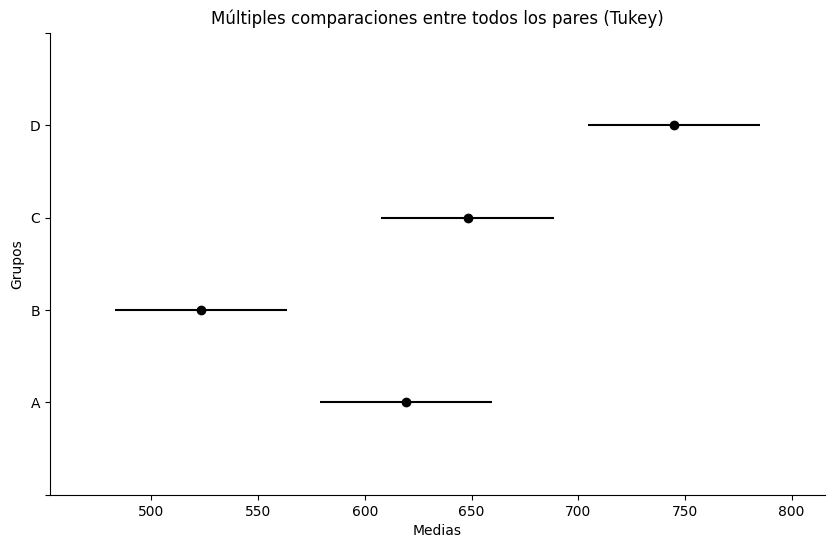

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Ruta'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#XIMENA DAVALOS F.

La ruta B es la que presenta el costo  más bajo y es significativamente más barata que las rutas A, C y D, pero la ruta D tiene el costo promedio más alto y es significativamente más cara que todas las demás rutas.

Entre las rutas A y C no se encontró una diferencia  significativa en el costo, lo que quiere decir que tienen costos similares

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1   group2  meandiff p-adj    lower    upper   reject
----------------------------------------------------------
Jueves     Lunes     3.75 0.9998 -132.5788 140.0788  False
Jueves    Martes   -48.75 0.7639 -185.0788  87.5788  False
Jueves Miércoles  -44.375 0.8107 -180.7038  91.9538  False
 Lunes    Martes    -52.5 0.7211 -188.8288  83.8288  False
 Lunes Miércoles  -48.125 0.7708 -184.4538  88.2038  False
Martes Miércoles    4.375 0.9998 -131.9538 140.7038  False
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

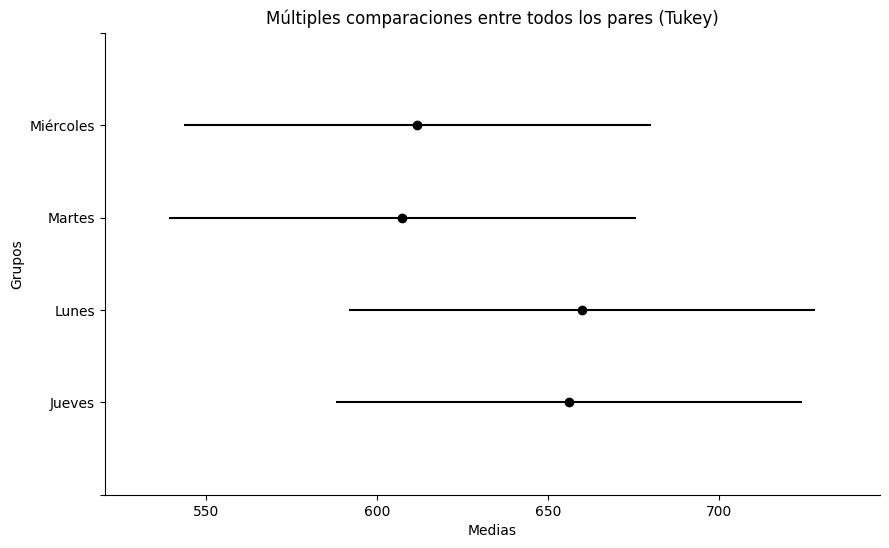

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Valor'], groups=df['Día'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#XIMENA DAVALOS F


La prueba de Tukey para comparar los costos promedio entre los días de la semana  no encontró diferencias  significativas en ninguno de los pares de días.

Esto quiere decir que los costos son similares y no dependen del día en que se realice la ruta.En conclusión, el día de la semana no parece influir significativamente en el costo.

##c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.

<ipython-input-24-1af7a0f32d4a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Ruta', y='Valor', data=df, ci=95)


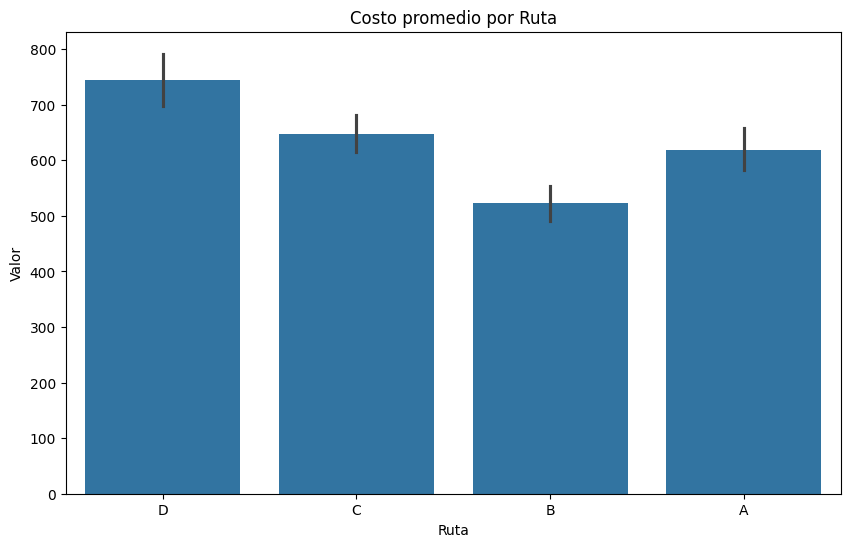

In [24]:
# Gráficos de medias por factor
plt.figure(figsize=(10,6))
sns.barplot(x='Ruta', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Ruta')
plt.show()

#XIMENA DAVALOS F

<ipython-input-25-0d7712501028>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Día', y='Valor', data=df, ci=95)


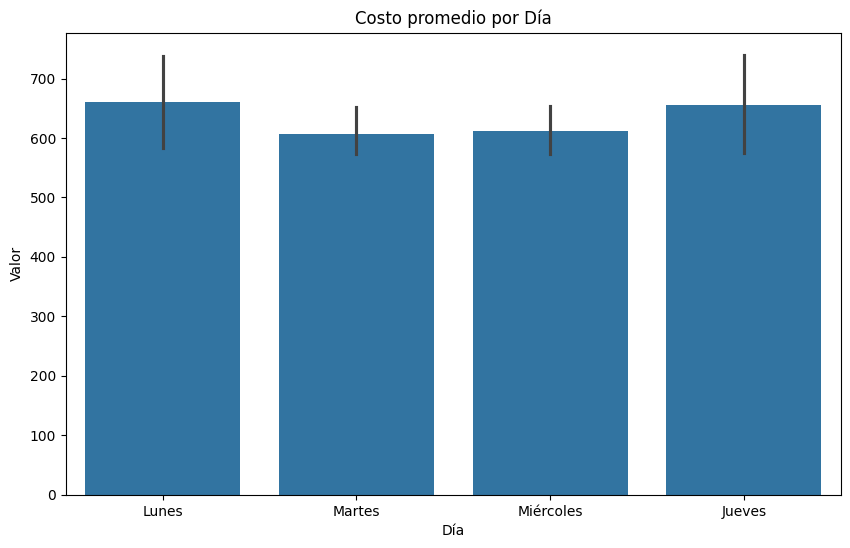

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='Día', y='Valor', data=df, ci=95)
plt.title('Costo promedio por Día')
plt.show()
#XIMENA DAVALOS F

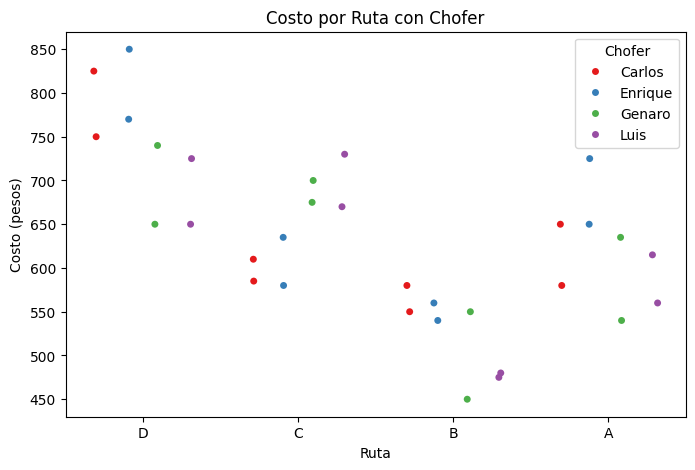

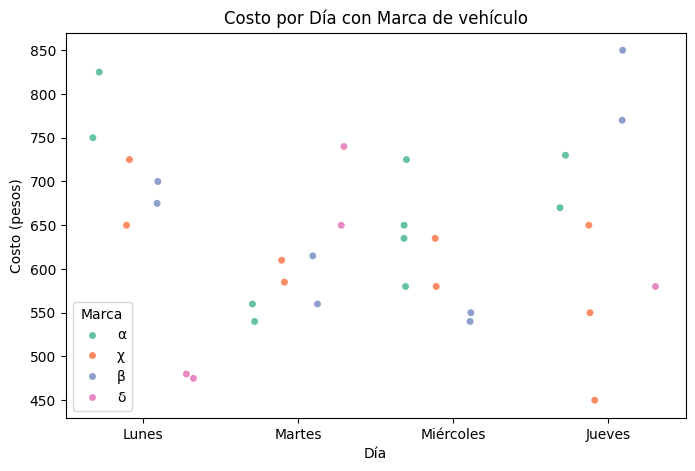

In [24]:
# Diagrama de dispersión costo vs ruta, coloreado por chofer
plt.figure(figsize=(8,5))
sns.stripplot(x='Ruta', y='Valor', hue='Chofer', data=df, dodge=True, jitter=True, palette='Set1')
plt.title('Costo por Ruta con Chofer')
plt.ylabel('Costo (pesos)')
plt.show()

# Diagrama de dispersión costo vs día, coloreado por marca
plt.figure(figsize=(8,5))
sns.stripplot(x='Día', y='Valor', hue='Marca', data=df, dodge=True, jitter=True, palette='Set2')
plt.title('Costo por Día con Marca de vehículo')
plt.ylabel('Costo (pesos)')
plt.show()
#XIMENA DAVALOS F

##SUPUESTO

In [25]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['Ruta'] == 'A']['Valor'],
    df[df['Ruta'] == 'B']['Valor'],
    df[df['Ruta'] == 'C']['Valor'],
    df[df['Ruta'] == 'D']['Valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

#XIMENA DAVALOS F

Estadístico de Bartlett: 3.4834660243252222
Valor p: 0.32291286179363426
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


##a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?
El experimento muestra que dar más lisina y proteína a las vacas ayuda a que produzcan más leche,pero la vaca que se use o el momento en que se haga el experimento no creo que cambienn mucho los resultados, así que lo más importante es la cantidad de lisina y proteína que se les da.

In [29]:
import pandas as pd
from io import StringIO

data = '''
Vaca,Periodo,Lisina,Proteina,Produccion
1,1,A,α,304
1,2,B,ε,436
1,3,C,β,350
1,4,D,φ,504
1,5,E,χ,417
1,6,F,γ,519
1,7,G,δ,432
2,1,B,β,381
2,2,C,φ,505
2,3,D,χ,425
2,4,E,γ,564
2,5,F,α,487
2,6,G,ε,536
2,7,A,χ,483
3,1,C,χ,432
3,2,D,γ,566
3,3,E,ε,479
3,4,F,α,357
3,5,G,β,466
3,6,A,φ,465
3,7,B,γ,507
4,1,D,δ,442
4,2,E,χ,372
4,3,F,ε,536
4,4,G,β,366
4,5,A,χ,495
4,6,B,φ,425
4,7,C,γ,507
5,1,E,ε,496
5,2,F,β,449
5,3,G,φ,493
5,4,A,χ,345
5,5,B,γ,509
5,6,C,δ,481
5,7,D,α,380
6,1,F,φ,534
6,2,G,χ,421
6,3,A,γ,352
6,4,B,δ,427
6,5,C,χ,346
6,6,D,ε,478
6,7,E,β,397
7,1,G,γ,543
7,2,A,δ,386
7,3,B,α,435
7,4,C,ε,485
7,5,D,φ,406
7,6,E,φ,554
7,7,F,χ,410

'''

df = pd.read_csv(StringIO(data))
df
#XIMENA DAVALOS F

,Vaca,Periodo,Lisina,Proteina,Produccion
0,1,1,A,α,304
1,1,2,B,ε,436
2,1,3,C,β,350
3,1,4,D,φ,504
4,1,5,E,χ,417
5,1,6,F,γ,519
6,1,7,G,δ,432
7,2,1,B,β,381
8,2,2,C,φ,505
9,2,3,D,χ,425


In [30]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Periodo'   # Primer bloque (factor no principal)
bloque_2 = 'Vaca'      # Segundo bloque (factor no principal)
bloque_3 = 'Lisina'      # Tercer bloque (factor no principal)
interes = 'Proteina'       # Variable de interés (tratamiento)
respuesta = 'Produccion'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")

#XIMENA DAVALOS F

Resultados del ANOVA para el Cuadro Latino:
                   sum_sq    df         F    PR(>F)
C(Proteina)  81658.082957   6.0  4.694560  0.002717
C(Periodo)    4518.955264   6.0  0.259797  0.950234
C(Vaca)      22265.466411   6.0  1.280052  0.303492
C(Lisina)    19815.528269   6.0  1.139204  0.370349
Residual     69576.774186  24.0       NaN       NaN

Conclusión: Hay diferencias significativas: Proteina.
Conclusión: No hay diferencias significativas: Periodo.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Lisina.


Proteína:

F = 4.69, p = 0.0027, el valor p es menor que 0.05, lo que quiere decr que hay diferencias significativas en la producción de leche según el porcentaje de proteína en la dieta.

Lisina:

F = 1.14, p = 0.3703, el valor p es mayor que 0.05, no hay evidencia  suficiente para afirmar que la lisina tiene un efecto significativo en la producción de leche.

Vaca:

F = 1.28, p = 0.3035,No hay diferencias significativas entre vacas en términos de producción.

Periodo:
F = 0.26, p = 0.9502, el valor p es muy alto, lo que quiere decir que que el momento en que se midió la producción no tuvo ningún efecto.

##b) Interprete los resultados usando gráficos de medias.





<ipython-input-31-9d51d9659e2a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Proteina', y='Produccion', estimator=np.mean, errorbar='sd', palette='viridis')


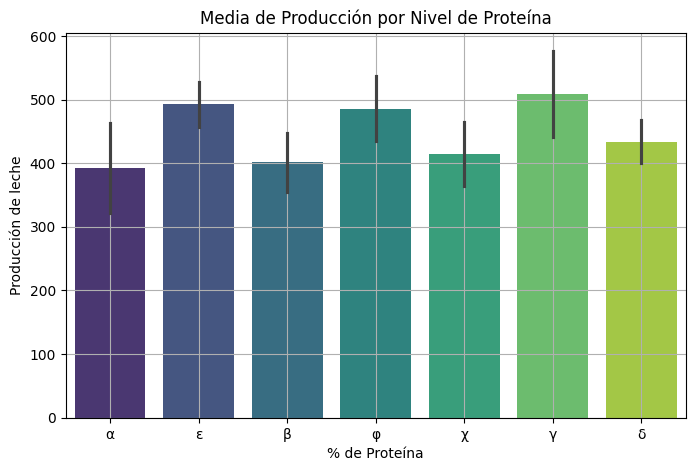

In [31]:

# Gráfico de medias por nivel de proteína
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Proteina', y='Produccion', estimator=np.mean, errorbar='sd', palette='viridis')
plt.title('Media de Producción por Nivel de Proteína')
plt.ylabel('Producción de leche')
plt.xlabel('% de Proteína')
plt.grid(True)
plt.show()

#XIMENA DAVALOSS F

Las barras más altas indican niveles de proteína donde las vacas produjeron más leche en promedio.

Los niveles con mayor producción media son:

γ (14%)

ε (10%)

φ (12%)

El nivel más bajo es α (2%), lo que confirma que a mayor porcentaje de proteína, mayor producción de leche.

Las barras de error indican que hay algo de diferencia, pero la diferencia entre niveles altos y bajos es lo suficientemente clara como para haber sido significativa en el ANOVA (como ya vimos con un valor p de 0.0027).

El gráfico muestra que cuando se da más proteína  a las vacas, producen más leche en promedio. Cuando tienen solo 2% o 4%, producen mucho menos. Esto  coincidecon el resultado del ANOVA, que indicó que el nivel de proteína sí tiene un efecto importante en la producción de leche.




##c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?

En este problema, se midió cuánta leche producían varias vacas durante diferentes periodos de tiempo, mientras se les daba alimento con diferentes niveles de proteína y lisina.

También se revisó si la vaca  daba más leche que otra, o el periodo de tiempo  influían en la cantidad de leche. Pero los resultados del análisis estadístico mostraron que las vacas y los periodos no tuvieron un efecto importante.

 En conclusión, las vacas y los periodos no cambiaron mucho la producción de leche porque el experimento estuvo bien organizado y porque todas las vacas se parecian, y los periodos fueron tranquilos y no hubo cambios grandes.

Esto es algo bueno, porque significa que los resultados que se vieron (como el efecto de la proteína) no se deben a diferencias entre vacas o al paso del tiempo, sino realmente al tratamiento.

##d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?


In [32]:
# Promedios de producción por combinación
tabla_medias = df.pivot_table(values='Produccion', index='Lisina', columns='Proteina', aggfunc='mean')
print(tabla_medias)
#XIMENA DAVALOS F

Proteina      α      β      γ      δ      ε      φ      χ
Lisina                                                   
A         304.0    NaN  352.0  386.0    NaN  465.0  441.0
B         435.0  381.0  508.0  427.0  436.0  425.0    NaN
C           NaN  350.0  507.0  481.0  485.0  505.0  389.0
D         380.0    NaN  566.0  442.0  478.0  455.0  425.0
E           NaN  397.0  564.0    NaN  487.5  554.0  394.5
F         422.0  449.0  519.0    NaN  536.0  534.0  410.0
G           NaN  416.0  543.0  432.0  536.0  493.0  421.0


La mejor producción de leche se obtuvo con 0.3% de lisina y 14% de proteína, lo que indica que las combinaciones con proteína alta  y lisina entre 0.3% y 0.5% son las más efectivas para maximizar la producción en vacas lecheras.

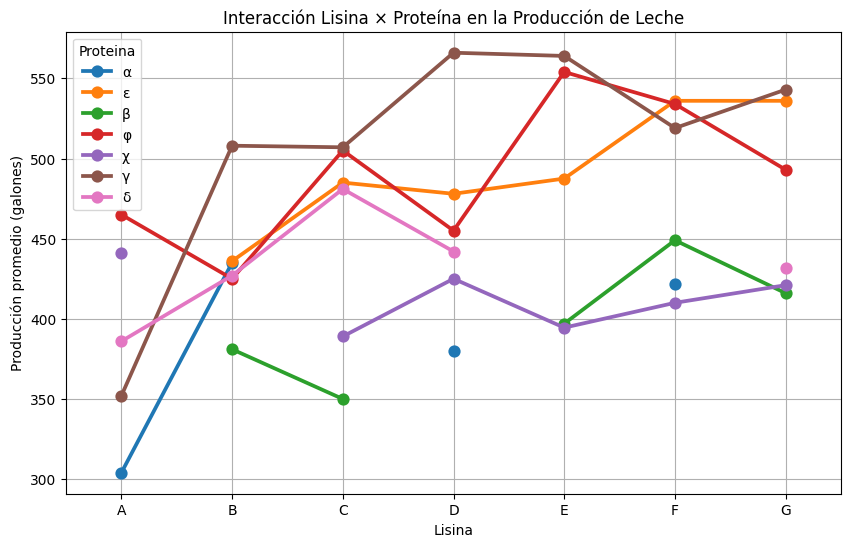

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.pointplot(data=df, x='Lisina', y='Produccion', hue='Proteina', palette='tab10', errorbar=None)
plt.title('Interacción Lisina × Proteína en la Producción de Leche')
plt.ylabel('Producción promedio (galones)')
plt.grid(True)
plt.show()

#XIMENA DAVALOS F

El gráfico muestra cómo cambia la producción promedio de leche dependiendo de las combinaciones entre los niveles de lisina (A a G) y proteína (α a γ).

Las líneas representan cada nivel de proteína, y muestran cómo varía la producción al cambiar los niveles de lisina y se observa que las líneas no son paralelas, lo que se puede interpretar que hay una interacción entre los dos, el efecto de la lisina depende del nivel de proteína y viceversa.

##e) Verifique los supuestos del modelo.

In [10]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Proteina'] == 'A']['Produccion'], "Ruta A", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 'B']['Produccion'], "Ruta B", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 'C']['Produccion'], "Ruta C", nivel_de_significancia)
prueba_shapiro(df[df['Proteina'] == 'D']['Produccion'], "Ruta D", nivel_de_significancia)
#XIMENA DAVALOS F.



Prueba de Shapiro-Wilk para Ruta A:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta B:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta C:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Ruta D:
Estadístico: nan
Valor p: nan
Interpretación: Los datos no tienen una distribución normal.


<ipython-input-10-82695a918e38>:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(datos)
